# Overhead EBUS-Climate Correlations
Previously, I created an area-weighted time series of CO$_{2}$ flux and Adam Phillip's climate indices. This gives us a picture of how the whole EBUS varies with a climate index predictor. However, it prevents us from getting a taste of the spatial correlations. Perhaps a relatively high correlation score is due to a very high correlated cluster. Perhaps there is a gradient in the correlations themselves. Perhaps there are some negative and some positive scores within a given system.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import esmtools as et
import cartopy.crs as ccrs
plt.style.use('ocn-clim')
import cmocean.cm as cm
import cartopy.feature as cfeature
import seaborn as sns
import glob

/glade/u/home/rbrady/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


# Functions

In [2]:
def load_overhead_correlations(EBU, predictor, lag, smooth):
    """
    Loads in the results of the overhead correlation analysis that was
    run as a python script.
    
    EBU       : Acronym for the EBUS of interest.
    predictor : Predictor variable for the gas flux (e.g. NPGO)
    lag       : Lag in months applied
    smooth    : Smooth in months applied
    """
    filedir = '/glade/p/work/rbrady/EBUS_BGC_Variability/regional_regressions/'
    filepath = filedir + EBU + '/' + predictor + '/lag' + str(lag) + '/'
    if smooth == 0:
        filename = (filepath + predictor + '.FG_ALT_CO2.' + EBU + 
                    '.*.unsmoothed_regional_regression.lag' +
                    str(lag) + '.nc')
    else:
        filename = (filepath + predictor + '.FG_ALT_CO2.' + EBU + 
                    '.*.smoothed' + str(smooth) + '_regional_regression.lag' +
                    str(lag) + '.nc')
    ds = xr.open_mfdataset(filename, concat_dim='ensemble')
    return ds

In [3]:
ens = ['001', '002', '009', '010', '011',
       '012', '013', '014', '015', '016',
       '017', '018', '019', '020', '021',
       '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031',
       '032', '033', '034', '035', '101',
       '102', '103', '104', '105']

# Visualization

In [9]:
EBU = 'CanCS'
VAR = 'AMO'
lag = 0
smooth = 12

In [10]:
ds = load_overhead_correlations(EBU, VAR, lag, smooth)
mask = ds['r'].sel(ensemble=0) # Use to re-nan things that aren't in region.
ds = ds.where(ds.p <= 0.05, -999)

/glade/u/home/rbrady/anaconda3/envs/py36/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)
/glade/u/home/rbrady/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


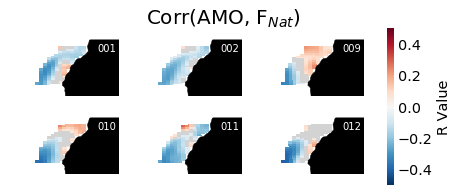

In [11]:
import matplotlib as mpl
f, axes = plt.subplots(nrows=2, ncols=3,
                       subplot_kw={'projection': ccrs.Mercator()},
                       gridspec_kw={'wspace':0.1, 'hspace':0},
                       figsize=(8,3))

st = f.suptitle('Corr(AMO, F$_{Nat}$)', fontsize=20)
for i, ax in enumerate(axes.flat):
    data = ds['r'].sel(ensemble=i)
    data = np.ma.array(data, mask=np.isnan(mask))
    ax.outline_patch.set_edgecolor('w')    
    
    # r-value pcolormesh
    cmap = plt.cm.RdBu_r
    p = ax.pcolormesh(ds['TLONG']-1, ds['TLAT'], data, 
                      transform=ccrs.PlateCarree(), vmin=-0.5, vmax=0.5,
                      cmap=cmap)
    p.cmap.set_under('#d3d3d3')
    ax.add_feature(cfeature.LAND, facecolor='k')
    
    
    # Labels
    ax.text(-7, 30, str(ens[i]), color='w', transform=ccrs.Geodetic())

f.tight_layout()
f.subplots_adjust(top=0.85)
st.set_y(0.95)

# Colorbar
cax,kw = mpl.colorbar.make_axes([ax for ax in axes.flat])
cb = plt.colorbar(p, cax=cax, **kw)
cb.set_label('R Value')